# Первичный анализ и предобработка данных с Pandas

В этом задании рассмотрим первичный анализ данных на примере реальных данных по шоколадным батончикам. Данные содержат следующие атрибуты: 'company' - компания производитель, 'bar_name' - название шоколадного батончика, 'ref' - номер, 'rew_date' - дата оценки, 'percent' - процент какао бобов, 'company_loc' - местонахождение компании, 'rate' - рейтинг, 'bean_dtype' - тип какао бобов, 'bean_orig' - страна происхождения.

Лабораторная работа №1
Вяткина Арина
Минеева Анна
РИ-471223

## Численные атрибуты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
best_bar= pd.read_csv('flavors_of_cacao.csv',
                       sep=',', header=0, names=['company', 'bar_name','ref', 'rew_date', 'percent', 'company_loc', 'rate', 'bean_dtype', 'bean_orig'])

In [3]:
type(best_bar)

pandas.core.frame.DataFrame

Оставим только только местонахождение компании, рейтинг, процент какао бобов и страну происхождения для дальнейшего анализа.

In [4]:
best_bar = best_bar[['company_loc', 'rate', 'percent', 'bean_orig']]
best_bar.head() 

,company_loc,rate,percent,bean_orig
0,France,3.75,63%,Sao Tome
1,France,2.75,70%,Togo
2,France,3.00,70%,Togo
3,France,3.50,70%,Togo
4,France,3.50,70%,Peru


Необходимо построить гистограмму распределения рейтинга батончика через plot(). Количество столбцов гистограммы равно 20.
На одном графике необходимо построить график плотности вероятности, который строится на основе оценки непрерывного распределения вероятности. Гистограммы аппроксимируют комбинацией ядре, т.е. более простых распределений, например нормалього (гауссова). Поэтому графики плотности еще называют ядерной окенки плотности (KDE-kernel density estimate). Строится kde с помощью функции плот с параметром kind='kde'.

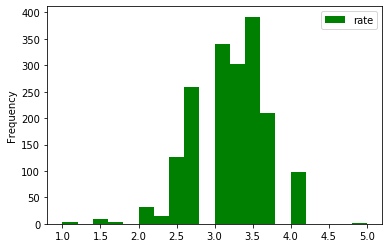

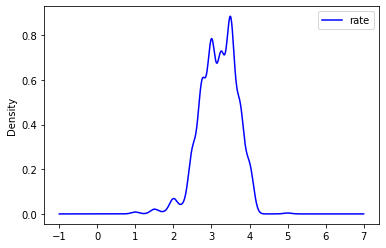

In [5]:
# Строим два графика: 
#        - гистограмму распределения рейтинга батончика 
#        - график плотности вероятности
best_bar.plot(kind='hist', color='green',bins=20)
best_bar.plot(kind='kde', color='blue')

Необходимо построить гистограмму распределения для процента какао бобов. Однако, следует отметить, что данные атрибут имеет тип object. Шистограмму для такого типа построить не получиться.

In [6]:
best_bar.dtypes

company_loc     object
rate           float64
percent         object
bean_orig       object
dtype: object

Необходимо преобразовать данный тип в float с помощью функции apply. Причем сначала необходимо убрать знак '%' в конце каждого элемента, а затем преобразовать в тип данных с плавающей точкой. Функция apply проходит по всем значениям данных и применяет указанную функцию.

In [7]:
# Данные из столбца 'percent' преобразуем в тип float
best_bar['percent'] = best_bar['percent'].apply(lambda x: x[:-1]).astype(float)

In [8]:
best_bar.head()

,company_loc,rate,percent,bean_orig
0,France,3.75,63.0,Sao Tome
1,France,2.75,70.0,Togo
2,France,3.00,70.0,Togo
3,France,3.50,70.0,Togo
4,France,3.50,70.0,Peru


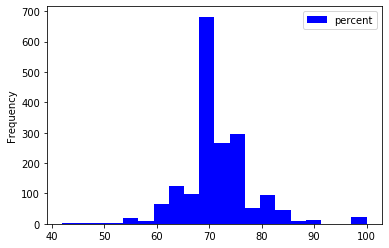

In [9]:
best_bar.plot('rate', kind='hist', color='blue', bins=20)

Постройте scatter plot зависимости рейтинга батончика от процента какао бобов, используя метод plot для Pandas DataFrame с аргументом kind='scatter'. Подпишите картинку.

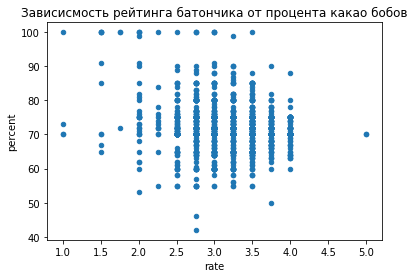

In [10]:
best_bar.plot('rate', 'percent',kind='scatter', title='Зависисмость рейтинга батончика от процента какао бобов')

Постройте "ящик с усами" для числовых распределений с помощью функции boxplot. Возпользуйтесь также функцией describe() для каждого распределения.

count    1795.000000
mean        3.185933
std         0.478062
min         1.000000
25%         2.875000
50%         3.250000
75%         3.500000
max         5.000000
Name: rate, dtype: float64

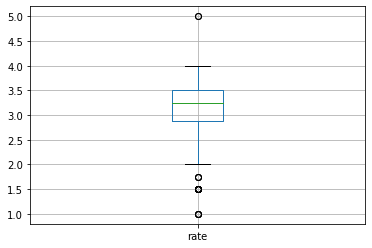

In [11]:
# Рейтинг
best_bar.boxplot(column='rate')
best_bar.rate.describe()

count    1795.000000
mean       71.698329
std         6.323118
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       100.000000
Name: percent, dtype: float64

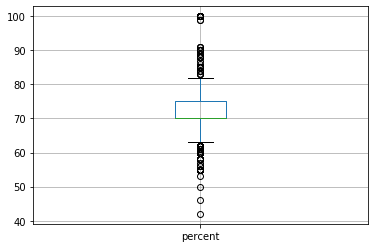

In [12]:
# Процент какао бобов
best_bar.boxplot(column='percent')
best_bar.percent.describe()

## Категориальные атрибуты

Обратим внимание на категориальные признаки. Построить гистограмму распределения не удасться, но в качестве начального анализа можно воспользоваться функцией value_counts, которая позволяет вывести количество встречающихся значений в атрибуте данных. Обратите внимание внимание на места происхождения бобов, которые редко встречаются в наборе данных. Для вывода начальных и конечных элементов используются функции head() и tail() соответственно.

In [13]:
# Выводим количество повторов каждой страны
value_borig = best_bar.bean_orig.value_counts()
value_borig

Venezuela                        214
Ecuador                          193
Peru                             165
Madagascar                       145
Dominican Republic               141
                                  73
Nicaragua                         60
Brazil                            58
Bolivia                           57
Belize                            49
Papua New Guinea                  42
Colombia                          40
Costa Rica                        38
Vietnam                           38
Tanzania                          34
Ghana                             33
Trinidad                          33
Mexico                            30
Guatemala                         28
Hawaii                            28
Domincan Republic                 25
Jamaica                           20
Grenada                           19
Indonesia                         16
Honduras                          15
Cuba                              11
Sao Tome                          10
C

После того, как выведено количество уникальных значений можно представить их визуальное распределение с помощью функции plot(kind='bar').

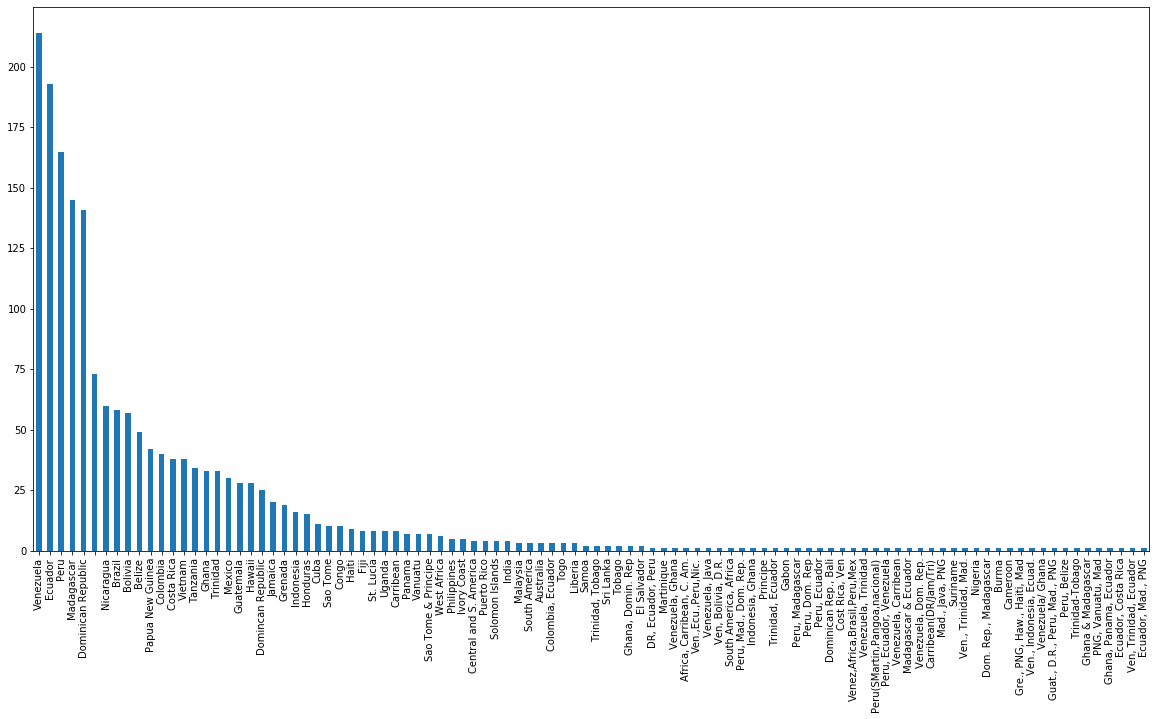

In [14]:
# Выводим график распредления для данных, полученных выше
value_borig.plot(kind='bar',figsize=(20,10))

По гистограмме распределения категориальных атрибутов о происхождения какао бобов можно увидеть, что присутствует хаос в данных. Для некоторых объектов названия мест происхождения написаны с ошибками, у некоторых объектов вообще отсутствует место происхождения, а так же есть батончики, состоящие из какао бобов из разных мест происхождения. В этой связи необходимо произвести предобработку данных для дальнейшего анализа.
Для начала убрать объекты с пропущенными записями, используя функцию dropna. Необходимо отметить, что в качестве параметров функции передается 'axis', где 0 - удалять по строкам (объектам), 1 - удалять по столбцам, 'how', где 'any' - удалять строку или столбец, если есть пустой объект, 'all' - удалять строку или столбец, если все объекты пустые.  

In [15]:
# Убираем объекты с пропущенными записями
delete = best_bar.dropna(axis=0)

Заметим, что пустые записи из атрибута происхождения бобов не удалилсь. Значит "пустые" записи не являются пустыми. Выведите все уникальные значения атрибута 'bean_orig' с помощью функции unique() и найдите значение пустой записи.

In [16]:
# Выводим уникальные значения атрибута 'bean_orig'
delete['bean_orig'].unique()
# Находим значение пустой записи '\xa0'

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', '\xa0', 'Jamaica',
       'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Domincan Republic', 'Haiti', 'Congo', 'Philippines', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Sao Tome & Principe', 'Vanuatu', 'Australia',
       'Liberia', 'Ecuador, Costa Rica', 'West Africa', 'Hawaii',
       'St. Lucia', 'Cost Rica, Ven', 'Peru, Madagascar',
       'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Tobago', 'Ven., Indonesia, Ecuad.',
       'Trinidad-Tobago

Для того, чтобы исключить данный элемент, необходимо использовать слудующую конструкцию: best_bar['bean_orig'] != 'element value', которая вернет бинарный массив элементов, где True - атрибут объекта не принимает значение 'element value', False - атрибут объекта принимает значение 'element value'. Затем полученную бинарную матрицу передаем в качестве маски, по которой будут выбраны объекты из нашего массива данных.

In [17]:
# Заводим переменную, в которую помещаем массив, состоящий из True и False
matrix = delete['bean_orig'] != '\xa0'

In [18]:
matrix.value_counts()

True     1721
False      73
Name: bean_orig, dtype: int64

In [19]:
# Передаем нашу маску, по которой будут выбраны объекты без пустых записей
q = delete[matrix]
q

,company_loc,rate,percent,bean_orig
0,France,3.75,63.0,Sao Tome
1,France,2.75,70.0,Togo
2,France,3.00,70.0,Togo
3,France,3.50,70.0,Togo
4,France,3.50,70.0,Peru
5,France,2.75,70.0,Venezuela
6,France,3.50,70.0,Cuba
7,France,3.50,70.0,Venezuela
8,France,3.75,70.0,Venezuela
9,France,4.00,70.0,Peru


In [20]:
print(q.shape)

(1721, 4)


Помимо этого необходимо решить проблему с батончиками из разных какао бобов. Лучшим способом является обработка и разделение этих составных бобов. Но на данном этапе, в виду их малого вклада, мы уберем их и сделаем одним видом сложного состава 'complex'. Будем считать редковстречающимися, если в выборке их не более 5.

In [21]:
# Создаем список, в который записываем название стран, повторяющихся не более 5 раз
stroka = []
k = q['bean_orig'].value_counts()
for i in range(k.count()):
    if (k[i] <= 5):
        stroka.append(k.index[i])

In [22]:
stroka

['Philippines',
 'Ivory Coast',
 'Central and S. America',
 'Puerto Rico',
 'Solomon Islands',
 'India',
 'Malaysia',
 'South America',
 'Australia',
 'Colombia, Ecuador',
 'Togo',
 'Liberia',
 'Samoa',
 'Trinidad, Tobago',
 'Sri Lanka',
 'Tobago',
 'Ghana, Domin. Rep',
 'El Salvador',
 'DR, Ecuador, Peru',
 'Martinique',
 'Venezuela, Ghana',
 'Africa, Carribean, C. Am.',
 'Ven.,Ecu.,Peru,Nic.',
 'Venezuela, Java',
 'Ghana & Madagascar',
 'South America, Africa',
 'Peru, Mad., Dom. Rep.',
 'Indonesia, Ghana',
 'Principe',
 'Trinidad, Ecuador',
 'Gabon',
 'Peru, Madagascar',
 'Peru, Dom. Rep',
 'Peru, Ecuador',
 'Dominican Rep., Bali',
 'Cost Rica, Ven',
 'Venez,Africa,Brasil,Peru,Mex',
 'Venezuela, Trinidad',
 'Peru(SMartin,Pangoa,nacional)',
 'Peru, Ecuador, Venezuela',
 'Venezuela, Carribean',
 'Madagascar & Ecuador',
 'Venezuela, Dom. Rep.',
 'Carribean(DR/Jam/Tri)',
 'Mad., Java, PNG',
 'Suriname',
 'Ven., Trinidad, Mad.',
 'Nigeria',
 'Dom. Rep., Madagascar',
 'Burma',
 'Cameroon'

In [24]:
# С помощью созданного выше списка меняем полученные страны на 'complex'
for i in range(len(stroka)):
    q.loc[q['bean_orig'] == stroka[i], 'bean_orig'] = 'complex'

In [25]:
q

,company_loc,rate,percent,bean_orig
0,France,3.75,63.0,Sao Tome
1,France,2.75,70.0,complex
2,France,3.00,70.0,complex
3,France,3.50,70.0,complex
4,France,3.50,70.0,Peru
5,France,2.75,70.0,Venezuela
6,France,3.50,70.0,Cuba
7,France,3.50,70.0,Venezuela
8,France,3.75,70.0,Venezuela
9,France,4.00,70.0,Peru


In [26]:
q['bean_orig'].value_counts()

Venezuela              214
Ecuador                193
Peru                   165
Madagascar             145
Dominican Republic     141
complex                101
Nicaragua               60
Brazil                  58
Bolivia                 57
Belize                  49
Papua New Guinea        42
Colombia                40
Vietnam                 38
Costa Rica              38
Tanzania                34
Ghana                   33
Trinidad                33
Mexico                  30
Guatemala               28
Hawaii                  28
Domincan Republic       25
Jamaica                 20
Grenada                 19
Indonesia               16
Honduras                15
Cuba                    11
Congo                   10
Sao Tome                10
Haiti                    9
Fiji                     8
Uganda                   8
Carribean                8
St. Lucia                8
Panama                   7
Sao Tome & Principe      7
Vanuatu                  7
West Africa              6
N

Постройте круговую гистограмму распределения для стран происзводителей какао бобов с помощью функции pie().

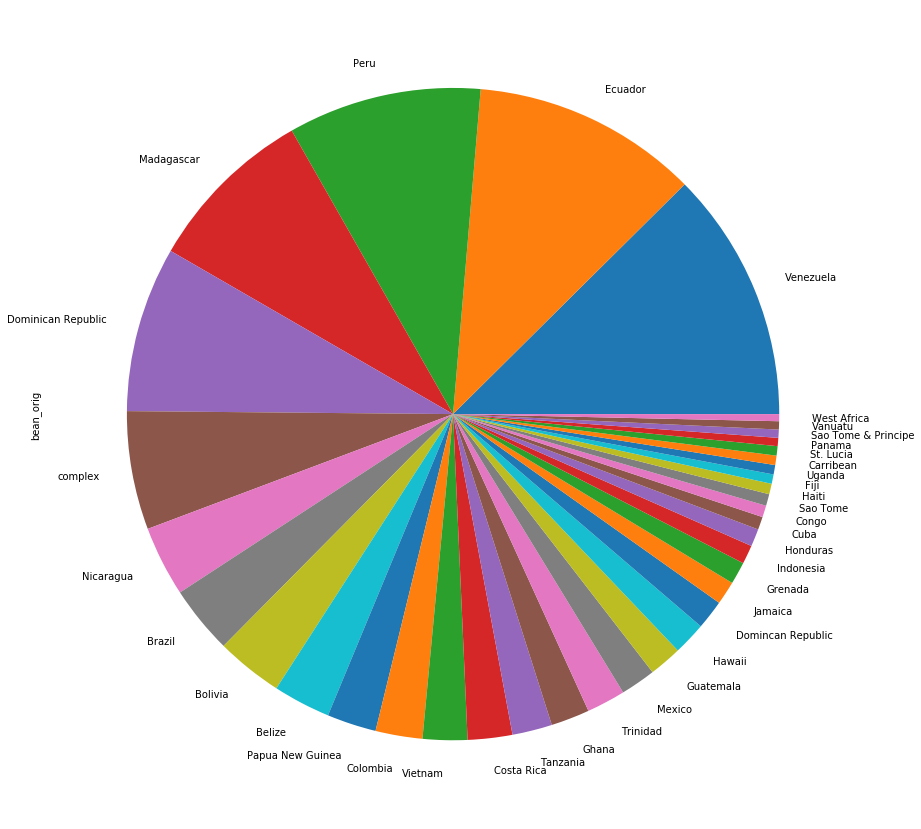

In [27]:
# Строим круговую гистограмму для стран происзводителей какао бобов 
q['bean_orig'].value_counts().plot.pie(figsize=(20,15))

## Попарные графики распределений

In [28]:
from sklearn import preprocessing
from seaborn import pairplot
import seaborn as sns

Построить попарные распределения для всех признаков.

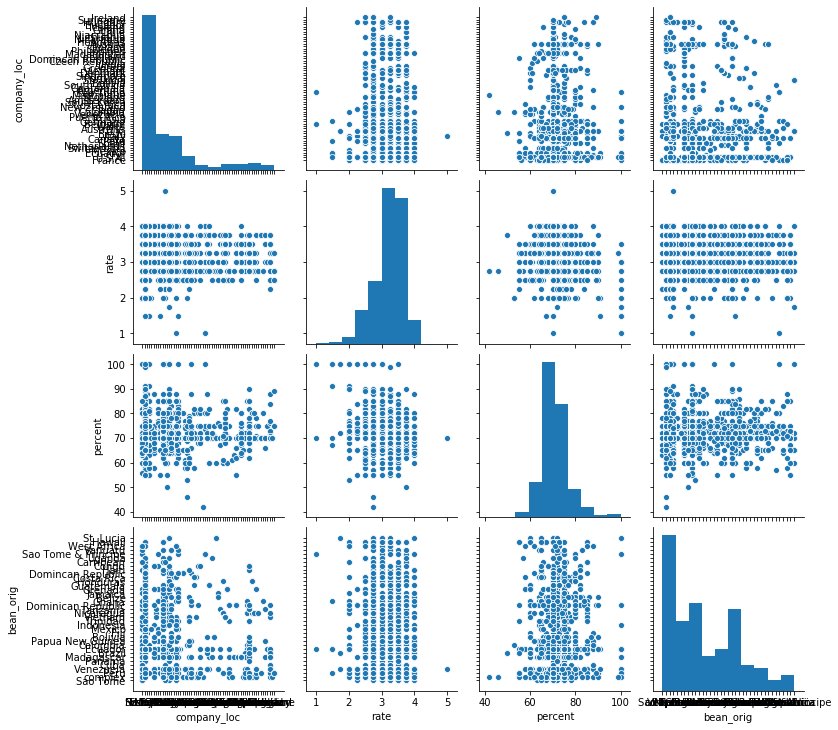

In [31]:
# Строим попарные распределения для всех признаков
pairplot(q, vars = ['company_loc', 'rate', 'percent', 'bean_orig'])

Определите, где растут лучшие какао бобы, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения. Напишите первую тройку лучших в обоих случаях.

In [32]:
q.groupby(['bean_orig'])['rate'].mean()q.groupby(['bean_orig'])['rate'].mean()

bean_orig
Belize                 3.234694
Bolivia                3.197368
Brazil                 3.284483
Carribean              2.968750
Colombia               3.225000
Congo                  3.325000
Costa Rica             3.144737
Cuba                   3.250000
Domincan Republic      3.190000
Dominican Republic     3.209220
Ecuador                3.134715
Fiji                   3.125000
Ghana                  3.090909
Grenada                3.026316
Guatemala              3.321429
Haiti                  3.388889
Hawaii                 3.214286
Honduras               3.350000
Indonesia              3.187500
Jamaica                3.162500
Madagascar             3.265517
Mexico                 3.008333
Nicaragua              3.200000
Panama                 3.178571
Papua New Guinea       3.291667
Peru                   3.137879
Sao Tome               3.175000
Sao Tome & Principe    3.178571
St. Lucia              2.968750
Tanzania               3.205882
Trinidad               3.20454

In [36]:
q.groupby(['bean_orig'])['rate'].mean().sort_values(ascending=False).head(3)

bean_orig
Haiti       3.388889
Honduras    3.350000
Congo       3.325000
Name: rate, dtype: float64

Вычислив среднее значение, можем сделать вывод, что лучшие какао бобы - Гаити, Гондурас,  Конго

In [37]:
q.groupby(['bean_orig'])['rate'].median()

bean_orig
Belize                 3.250
Bolivia                3.250
Brazil                 3.375
Carribean              3.000
Colombia               3.250
Congo                  3.375
Costa Rica             3.125
Cuba                   3.250
Domincan Republic      3.250
Dominican Republic     3.250
Ecuador                3.250
Fiji                   3.250
Ghana                  3.000
Grenada                3.250
Guatemala              3.250
Haiti                  3.250
Hawaii                 3.250
Honduras               3.500
Indonesia              3.250
Jamaica                3.250
Madagascar             3.250
Mexico                 3.000
Nicaragua              3.250
Panama                 3.250
Papua New Guinea       3.250
Peru                   3.250
Sao Tome               3.125
Sao Tome & Principe    3.500
St. Lucia              3.000
Tanzania               3.250
Trinidad               3.250
Uganda                 2.750
Vanuatu                3.250
Venezuela              3.250
Viet

In [40]:
q.groupby(['bean_orig'])['rate'].median().sort_values(ascending=False).head(3)

bean_orig
Honduras               3.500
Sao Tome & Principe    3.500
Vietnam                3.375
Name: rate, dtype: float64

In [ ]:
Вычислив медиану, можем сделать вывод, что лучшие какао бобы - Гондурас, Сан-Томе и Принсипи, Вьетнам

Определите, где производят лучшие батончики, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения.

In [38]:
q.groupby(['company_loc'])['rate'].mean()
q.groupby(['company_loc'])['rate'].mean().sort_values(ascending=False).head(3)

company_loc
Chile          3.75
Amsterdam      3.50
Netherlands    3.50
Name: rate, dtype: float64

Вычислив среднее значение, можем сделать вывод, что лучшие батончики производят в Чили, Амстердаме, Нидерландах 

In [39]:
q.groupby(['company_loc'])['rate'].median()
q.groupby(['company_loc'])['rate'].median().sort_values(ascending=False).head(3)

company_loc
Chile        3.75
Amsterdam    3.50
Canada       3.50
Name: rate, dtype: float64

Вычислив медиану, можем сделать вывод, что лучшие батончики производят в Чили, Амстердаме, Канаде